#Run this before starting
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"


In [20]:
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"

2.0.0+cpu
None


In [128]:
import numpy as np 
import matplotlib.pyplot as plt
import random


values_list = []  # create an empty list to store the values for each row
x = []
z = []
m = []
l = []

with open('data.txt', "r") as f:
    for line in f:  # loop over each line in the file
        values = line.strip().split("\t")  # split the line into a list of strings

        xL = []
        zL = []
        mL = []
        lL = []

        for i in range(20):
            xL.append(round(float(values[i]),3))
            zL.append(round(float(values[i+20]),3))
            mL.append(round(float(values[i+20*2]),3))
            try:
                lL.append(round(float(values[i+20*3]),3))
            except:
                None
        x.append(xL)
        z.append(zL)
        m.append(mL)
        l.append(lL)


dataY = []

dataX = []
for i in range(len(x)):
    dataXs = []
    for j in range(0,len(x[i])):
        dataX0 = []
        dataX0.append(j)
        dataX0.append(x[i][j])
        dataX0.append(z[i][j])
        dataXs.append(dataX0)
    dataX.append(dataXs)

dataX = np.array(dataX)
dataY = np.array(m)

dataEgdeIndex = []
for i in range(len(x[0])-1):
    dataEgdeIndex.append([i,i+1])
    dataEgdeIndex.append([i+1,i])  


dataEgdeIndex = np.array(dataEgdeIndex) 
#dataEgdeIndex =np.transpose(dataEgdeIndex)


input_data = dataX
target_data = dataY
edge_index = dataEgdeIndex

zipped = list(zip(dataX, dataY))
random.shuffle(zipped)
dataX, dataY = zip(*zipped)

l1 = [[[1,2],[2,3]],[[3,4],[4,6]]]
l2 = [[1,2],[2,3]]

zipped = list(zip(l1, l2))
random.shuffle(zipped)
l1, l2 = zip(*zipped)

print(l1)
print(l2)


([[3, 4], [4, 6]], [[1, 2], [2, 3]])
([2, 3], [1, 2])


In [138]:
print(dataX[1])

[[  0.      0.      0.   ]
 [  1.      7.368   0.   ]
 [  2.     14.737   0.   ]
 [  3.     22.105   0.   ]
 [  4.     29.474   0.   ]
 [  5.     36.842   0.   ]
 [  6.     44.211   0.   ]
 [  7.     51.579   0.   ]
 [  8.     58.947   0.   ]
 [  9.     66.316   0.   ]
 [ 10.     73.684   0.   ]
 [ 11.     81.053   0.   ]
 [ 12.     88.421   0.   ]
 [ 13.     95.789   0.   ]
 [ 14.    103.158   0.   ]
 [ 15.    110.526   0.   ]
 [ 16.    117.895   0.   ]
 [ 17.    125.263   0.   ]
 [ 18.    132.632   0.   ]
 [ 19.    140.      0.   ]]


In [110]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data
from torch_geometric.nn.conv import feast_conv
from torch_geometric.loader import DataLoader

In [46]:
#Original Herman Code
# Define a simple GNN model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(3, 16)
        self.conv2 = GCNConv(16, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x.squeeze(dim=1)

# Define a simple training function for the GNN model
def train(model, data, optimizer):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = F.mse_loss(output, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Define a simple testing function for the GNN model
def test(model, data):
    model.eval()
    output = model(data.x, data.edge_index)
    return output

""""
# Set up the input data
x = torch.tensor([
    [0,0,1,1,1,0,0,0],
    [10,5,0,0,0,0,5,0],
    [20,10,0,0,0,0,5,0],
    [30,5,0,0,0,0,5,0],
    [40,0,1,1,1,0,0,0]
], dtype=torch.float)

edge_index = torch.tensor([
    [0,1], [1,0], [1,2], [2,1], [2,3], [3,2], [3,4], [4,3]
], dtype=torch.long).t()

# Set up the output data (nodal forces and moments)
y = torch.tensor([
    [0,0,0,0,0,10,20,0],
    [0,0,0,0,0,5,0,0],
    [0,0,0,0,0,5,0,0],
    [0,0,0,0,0,5,0,0],
    [0,0,0,0,0,10,20,0]
], dtype=torch.float)
data = Data(x=x, edge_index=edge_index, y=y)
"""

# Create a Data object that encapsulates the input and output data

data = []
for i in range(len(dataX)):
    x = torch.tensor(dataX[i])
    y = torch.tensor(dataY[i])
    edge_index = torch.tensor((dataEgdeIndex), dtype=torch.long).t()
    data.append(Data(x=x, edge_index=edge_index, y=y))



# Initialize the GNN model
#input_dim = x.shape[1]
#output_dim = y.shape[1]
hidden_dim = 16
model = Net()

# Define the optimizer and the number of epochs for training
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 100

# Train the GNN model
for i in range(len(dataX)):
    loss = train(model, data[i], optimizer)
    print('Epoch {}: loss={}'.format(i, loss))


TypeError: Net.forward() takes 2 positional arguments but 3 were given

In [130]:
#attemt 2

#define modell
class GCN(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels, num_layers):
        super(GCN, self).__init__()
        self.convs = torch.nn.ModuleList()
        self.bns = torch.nn.ModuleList()
        self.num_layers = num_layers

        # input layer
        self.convs.append(GCNConv(input_channels, hidden_channels))
        self.bns.append(torch.nn.BatchNorm1d(hidden_channels))

        # hidden layers
        for i in range(num_layers - 2):
            self.convs.append(GCNConv(hidden_channels, hidden_channels))
            self.bns.append(torch.nn.BatchNorm1d(hidden_channels))

        # output layer
        self.convs.append(GCNConv(hidden_channels, output_channels))
        self.prediction_layer = torch.nn.Linear(output_channels, num_nodes)


    def forward(self, x, edge_index):
        for i in range(self.num_layers - 1):
            x = self.convs[i](x, edge_index)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=0.5, training=self.training)
        # output layer  
        x = self.convs[-1](x, edge_index)
        x = self.prediction_layer(x)

        return x

input_channels = 3  # number of features for each node
hidden_channels = 64
output_channels = 1  # number of output features for each node
num_layers = 5  # number of graph convolutional layers in the network
num_nodes = len(dataX[i])

model = GCN(input_channels, hidden_channels, output_channels, num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = len(dataX)
for i in range(num_epochs):
    x = torch.tensor(dataX[i], dtype=torch.float)
    y = torch.tensor(dataY[i], dtype=torch.float)
    edge_index = torch.tensor(dataEgdeIndex, dtype=torch.long).t().contiguous()

    # set model to training mode
    model.train()
    #print(model)
    optimizer.zero_grad()
    out = model(x, edge_index)
    #print(out)
    loss = F.mse_loss(out, y)
    loss.backward()
    optimizer.step()

    # set model to evaluation mode
    model.eval()

    with torch.no_grad():
        out = model(x, edge_index)
        val_loss = F.mse_loss(out, y)

    print(f'Epoch {i}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


C:\Users\eliasak\AppData\Local\Temp\ipykernel_27440\2682750836.py:59: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, y)
C:\Users\eliasak\AppData\Local\Temp\ipykernel_27440\2682750836.py:68: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  val_loss = F.mse_loss(out, y)


Epoch 0, Train Loss: 1.7858, Val Loss: 1.1525
Epoch 1, Train Loss: 68.8498, Val Loss: 67.2588
Epoch 2, Train Loss: 6.9740, Val Loss: 6.8077
Epoch 3, Train Loss: 7.5318, Val Loss: 7.1296
Epoch 4, Train Loss: 6.7697, Val Loss: 6.6878
Epoch 5, Train Loss: 1.1306, Val Loss: 1.3954
Epoch 6, Train Loss: 0.7117, Val Loss: 0.8460
Epoch 7, Train Loss: 1.1129, Val Loss: 0.5723
Epoch 8, Train Loss: 3.2320, Val Loss: 2.9873
Epoch 9, Train Loss: 1.1092, Val Loss: 0.7633
Epoch 10, Train Loss: 48.6386, Val Loss: 49.5466
Epoch 11, Train Loss: 1.1603, Val Loss: 1.0949
Epoch 12, Train Loss: 36.0159, Val Loss: 36.1430
Epoch 13, Train Loss: 1.2949, Val Loss: 0.8418
Epoch 14, Train Loss: 1.1838, Val Loss: 1.2728
Epoch 15, Train Loss: 23.2893, Val Loss: 23.4218
Epoch 16, Train Loss: 19.7109, Val Loss: 19.9666
Epoch 17, Train Loss: 0.7142, Val Loss: 0.2805
Epoch 18, Train Loss: 0.7053, Val Loss: 0.3054
Epoch 19, Train Loss: 0.9210, Val Loss: 0.8134
Epoch 20, Train Loss: 3.4976, Val Loss: 3.2696
Epoch 21, Tra

In [122]:
#attemt 1
class GCN(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels, num_layers):
        super(GCN, self).__init__()
        self.convs = torch.nn.ModuleList()
        self.bns = torch.nn.ModuleList()
        self.num_layers = num_layers

        # input layer
        self.convs.append(GCNConv(input_channels, hidden_channels))
        self.bns.append(torch.nn.BatchNorm1d(hidden_channels))

        # hidden layers
        for i in range(num_layers - 2):
            self.convs.append(GCNConv(hidden_channels, hidden_channels))
            self.bns.append(torch.nn.BatchNorm1d(hidden_channels))

        # output layer
        self.convs.append(GCNConv(hidden_channels, output_channels))
        self.bns.append(torch.nn.BatchNorm1d(output_channels))

    def forward(self, x, edge_index):
        for i in range(self.num_layers - 1):
            x = self.convs[i](x, edge_index)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=0.5, training=self.training)
        # output layer
        x = self.convs[-1](x, edge_index)
        return global_mean_pool(x, torch.zeros(x.shape[0], dtype=torch.long))

# assume dataX, dataY, dataEdgeIndex are given

input_channels = 3  # number of features for each node
hidden_channels = 64
output_channels = 1  # number of output features for each node
num_layers = 5  # number of graph convolutional layers in the network

model = GCN(input_channels, hidden_channels, output_channels, num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for i in range(len(dataX)):
    x = torch.tensor(dataX[i], dtype=torch.float)
    y = torch.tensor(dataY[i], dtype=torch.float)
    edge_index = torch.tensor(dataEgdeIndex, dtype=torch.long).t().contiguous()

    # set model to training mode
    model.train()

    optimizer.zero_grad()
    out = model(x, edge_index)
    loss = F.mse_loss(out, y)
    loss.backward()
    optimizer.step()

    # set model to evaluation mode
    model.eval()

    with torch.no_grad():
        out = model(x, edge_index)
        val_loss = F.mse_loss(out, y)

    print(f'Epoch {i}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


C:\Users\eliasak\AppData\Local\Temp\ipykernel_27440\2992925218.py:52: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, y)
C:\Users\eliasak\AppData\Local\Temp\ipykernel_27440\2992925218.py:61: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  val_loss = F.mse_loss(out, y)


Epoch 0, Train Loss: 1.3782, Val Loss: 2.9060
Epoch 1, Train Loss: 0.2650, Val Loss: 0.4255
Epoch 2, Train Loss: 7.3466, Val Loss: 8.2165
Epoch 3, Train Loss: 2.4732, Val Loss: 4.3371
Epoch 4, Train Loss: 0.7961, Val Loss: 1.8438
Epoch 5, Train Loss: 0.8936, Val Loss: 4.7732
Epoch 6, Train Loss: 0.2893, Val Loss: 1.8559
Epoch 7, Train Loss: 6.3535, Val Loss: 8.0194
Epoch 8, Train Loss: 0.5843, Val Loss: 4.6098
Epoch 9, Train Loss: 0.7314, Val Loss: 3.7344
Epoch 10, Train Loss: 21.7123, Val Loss: 21.5878
Epoch 11, Train Loss: 0.7372, Val Loss: 4.0146
Epoch 12, Train Loss: 0.3344, Val Loss: 3.1113
Epoch 13, Train Loss: 3.1212, Val Loss: 12.2694
Epoch 14, Train Loss: 2.6678, Val Loss: 8.3494
Epoch 15, Train Loss: 1.0060, Val Loss: 4.0696
Epoch 16, Train Loss: 48.1068, Val Loss: 48.3546
Epoch 17, Train Loss: 1.8044, Val Loss: 3.9336
Epoch 18, Train Loss: 0.6775, Val Loss: 1.1006
Epoch 19, Train Loss: 64.9093, Val Loss: 64.8838
Epoch 20, Train Loss: 0.7408, Val Loss: 2.3524
Epoch 21, Train 

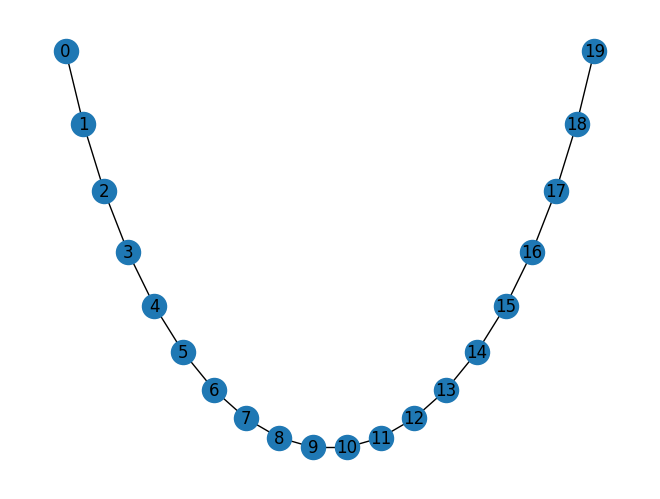

In [142]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph edges
edges = [(i, i+1) for i in range(19)]

# Define the node positions
node_positions = dataX[250]
node_positions = {i: (pos[1], pos[2]) for i, pos in enumerate(node_positions)}

# Create the graph object and set node positions
G = nx.Graph()
G.add_edges_from(edges)
nx.set_node_attributes(G, node_positions, 'pos')

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)

# Show the plot
plt.show()